In [1]:
# Predict pKp

In [2]:
!pip install kora
import kora.install.rdkit

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 


In [3]:
!pip install --pre deepchem

     |████████████████████████████████| 552kB 4.3MB/s 


In [4]:
from rdkit import Chem

In [5]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [7]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving training_set.csv to training_set.csv


In [8]:
data=pd.read_csv('training_set.csv')

In [9]:
data

,Unnamed: 0,PubChemID,SMILES,logKp,Total Molweight,cLogP,cLogS,H-Acceptors,H-Donors,Polar Surface Area,Rotatable Bonds,Aromatic Rings,sp3-Atoms,amide_amide,amide_amides,amine_amine,alkyl-amine_alkyl-amine,aromatic amine_aromatic amine,aromatic nitrogen_aromatic nitrogen,basic nitrogen_basic nitrogen,acidic oxygen_acidic oxygen,acidic oxygen_acidic oxygens,AA,ALCOHOL,ALIPH. MISC.,AROM. MISC.,AZEPANE,AZONE OTHER,CAPROLACTAM,ESTER,ETHER,FATTY ACID,INORGANIC MISC.,MORPHOLINE,PIPERAZINE,PIPERIDINE,PIPERIDONE,POLYOL,PYRROLIDINE,PYRROLIDONE,STEROID,SUCCINIMIDE,SURF,TERP
0,0,137,C(CC(=O)O)C(=O)CN,-4.15,131.1300,-3.0402,-0.490,4,2,80.39,4,0,5,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,85362,C(C(=O)NC(CC1=CNC2=CC=CC=C21)C(=O)O)N,-4.82,275.3070,-2.0668,-2.211,6,4,108.21,5,2,6,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,750,C(C(=O)O)N,-4.42,75.0667,-3.3504,-0.028,3,2,63.32,1,0,3,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,5962,C(CCN)CC(C(=O)O)N,-4.77,146.1890,-4.6792,-0.785,4,3,89.34,5,0,8,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,424,C(C(C(=O)O)N)C(=O)O,-5.03,133.1030,-3.8130,-0.151,5,3,100.62,3,0,5,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,641,170833,C[C@@H]1CC[C@H]([C@@H](C1)O)C(=C)C,-3.72,154.2520,2.6138,-2.404,1,1,20.23,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
159,643,442495,C[C@@H]1CCC(=C(C)C)C(=O)C1,-2.87,152.2360,2.8501,-2.252,1,0,17.07,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
160,644,6989,CC1=CC(=C(C=C1)C(C)C)O,-3.74,150.2200,2.8448,-2.535,1,1,20.23,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
161,646,7438,CC1=CCC(CC1O)C(=C)C,-2.91,152.2360,2.5093,-2.140,1,1,20.23,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
data.columns

Index(['DBMolID', 'PubChemID', 'SMILES', 'logKp', 'Total Molweight', 'cLogP',
       'cLogS', 'H-Acceptors', 'H-Donors', 'Polar Surface Area',
       'Rotatable Bonds', 'Aromatic Rings', 'sp3-Atoms', 'amide_amide',
       'amide_amides', 'amine_amine', 'alkyl-amine_alkyl-amine',
       'aromatic amine_aromatic amine', 'aromatic nitrogen_aromatic nitrogen',
       'basic nitrogen_basic nitrogen', 'acidic oxygen_acidic oxygen',
       'acidic oxygen_acidic oxygens', 'AA', 'ALCOHOL', 'ALIPH. MISC.',
       'AROM. MISC.', 'AZEPANE', 'AZONE OTHER', 'CAPROLACTAM', 'ESTER',
       'ETHER', 'FATTY ACID', 'INORGANIC MISC.', 'MORPHOLINE', 'PIPERAZINE',
       'PIPERIDINE', 'PIPERIDONE', 'POLYOL', 'PYRROLIDINE', 'PYRROLIDONE',
       'STEROID', 'SUCCINIMIDE', 'SURF', 'TERP'],
      dtype='object')

In [80]:
data=pd.read_csv('training_set.csv')
data=data.rename(columns={'Unnamed: 0':'DBMolID'})
test=data['SMILES']
list_smiles=test.to_list()
mols_smiles=[Chem.MolFromSmiles(i) for i in list_smiles]
print (mols_smiles)
vec_smiles=[AllChem.GetMorganFingerprintAsBitVect(i, 2, nBits=1024) for i in mols_smiles]
#Must be list comprehension map(lambda x: , mols_smiles)
#print (vec_smiles)
#vec_smiles

name_cols=['bit_'+str(f) for f in range(1,1025) ]
cols=[list(elem) for elem in vec_smiles]

bits_feat=pd.DataFrame(cols, columns=name_cols)

tmpd=pd.concat([data, bits_feat], axis=1)
#Can the moiety columns  be redundant with the bits?
df_4_model=tmpd.drop(['DBMolID', 'PubChemID', 'SMILES'],axis=1)




[<rdkit.Chem.rdchem.Mol object at 0x7f5d75e4b350>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75e38f80>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea9a30>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea98a0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea9d00>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2b70>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2a80>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2990>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea28a0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea27b0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea26c0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea25d0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea24e0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea23f0>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2300>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2210>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2120>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2030>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2c60>, <rdkit.Chem.rdchem.Mol object at 0x7f5d75ea2f30>,

In [99]:
allcs=df_4_model.columns[1:-1]
X=df_4_model[allcs]


y=df_4_model['logKp'].apply(lambda x: float(x.replace(',', '.')))
y.iloc[0]

-4.15

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rfc=RandomForestRegressor( n_estimators=100, max_depth=5,  min_samples_split=5, random_state=0,n_jobs=1 )

In [106]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [110]:
predicted_pKp=rfc.predict(X_test)

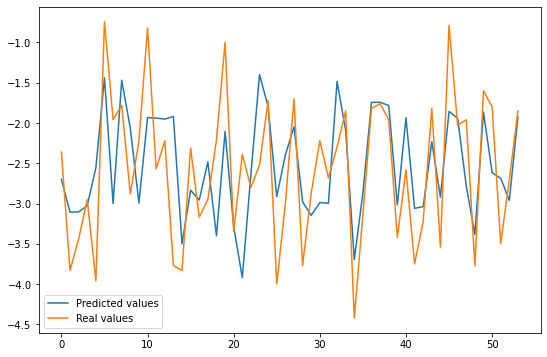

In [122]:
import matplotlib.pyplot as plt
y_test.values
plt.figure(figsize=(9,6))
plt.plot(predicted_pKp)
plt.plot(y_test.values)
plt.legend(['Predicted values', 'Real values'])

In [127]:
from sklearn.metrics import mean_absolute_error, r2_score

In [129]:
print (mean_absolute_error(y_test, predicted_pKp))
print (r2_score(y_test, predicted_pKp))

#rfc.class_weight

0.5782591591259642
0.36187718764418564
